# Homework 2 - Learning rate

In [100]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")

In [101]:
mu = 100
sigma = 20

## 1 - One over k learning rate

### 1.1 - Code

In [134]:
def one_over_k_learning_rate(mu, sigma, estimated_mu: int = 0, number_of_iteration: int = 1000, number_of_episodes: int = 4):

    df = pd.DataFrame(columns=['episode', 'iteration', 'estimation'])
    
    for i in range(1,number_of_episodes+1):
        estimated_mu = 0
        for k in range(1, number_of_iteration+1):
            alpha = 1/k
            estimated_mu = (1 - alpha) * estimated_mu +  alpha * np.random.normal(mu, sigma)
            df = pd.concat([df, pd.DataFrame.from_records([{'episode': f'{i}', 'iteration': k, 'estimation': estimated_mu}])])

        sns.lineplot(df, x='iteration', y='estimation', hue='episode', legend=False).set(title=f'Evolution of µ by setting α=1/k over {number_of_iteration} iterations for {number_of_episodes} episodes')

### 1.2 - Plots

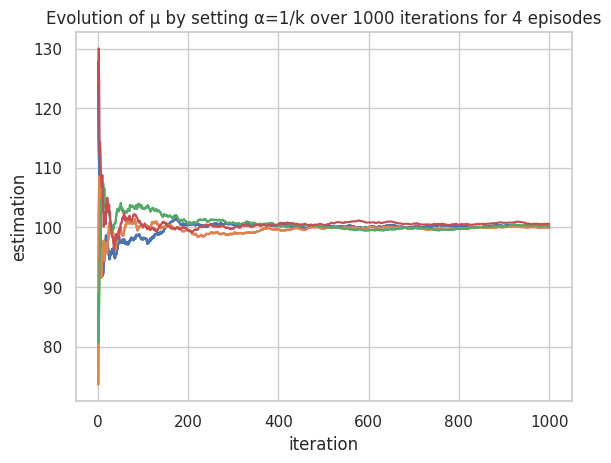

In [115]:
one_over_k_learning_rate(mu, sigma, estimated_mu=0)

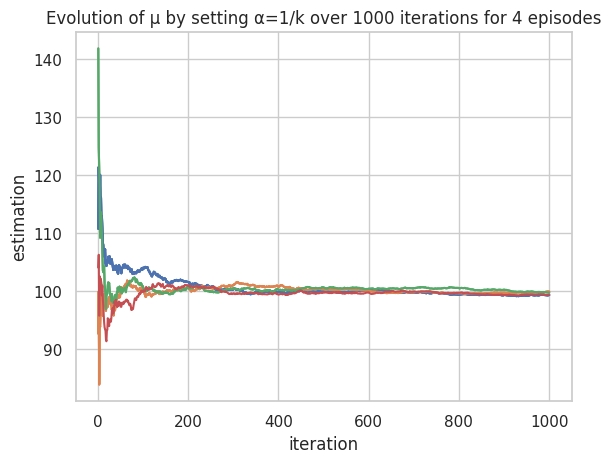

In [111]:
one_over_k_learning_rate(mu, sigma, estimated_mu=100)

### 1.3 - Analysis

We notice that the estimation of µ0 doesn't affect the result at all. Therefore, no estimation is needed to obtain a good result quickly. We also notice that the more iteration the algorithm goes through, the more precise the estimation will be.

## 2 - Alpha learning rate

### 2.1 - Code

In [124]:
def alpha_learning_rate(mu: float, sigma: float, alpha: float, initial_mu: float = 0.0, number_of_iteration: int = 1000, number_of_episodes: int = 4):

    df = pd.DataFrame(columns=['episode', 'iteration', 'estimation'])
    
    for i in range(1,number_of_episodes+1):
        estimated_mu = initial_mu
        for k in range(1, number_of_iteration+1):
            estimated_mu = (1 - alpha) * estimated_mu +  alpha * np.random.normal(mu, sigma)
            df = pd.concat([df, pd.DataFrame.from_records([{'episode': f'{i}', 'iteration': k, 'estimation': estimated_mu}])])

        sns.lineplot(df, x='iteration', y='estimation', hue='episode', legend=False).set(title=f'Evolution of µ by setting α={alpha} over {number_of_iteration} iterations for {number_of_episodes} episodes')


### 2.2 - Plots

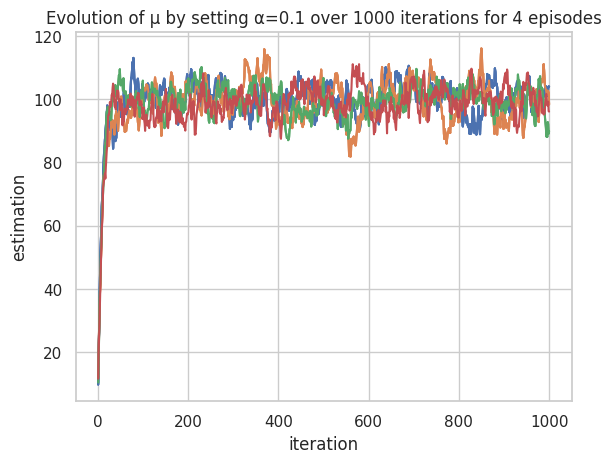

In [120]:
alpha_learning_rate(mu, sigma, alpha=0.1)

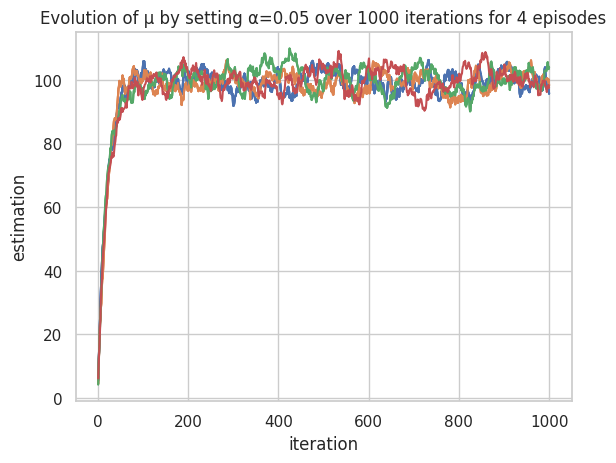

In [106]:
alpha_learning_rate(mu, sigma, alpha=0.05)

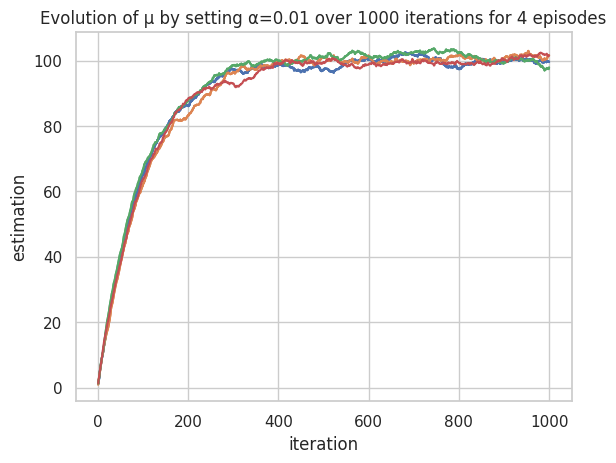

In [119]:
alpha_learning_rate(mu, sigma, 0.01)

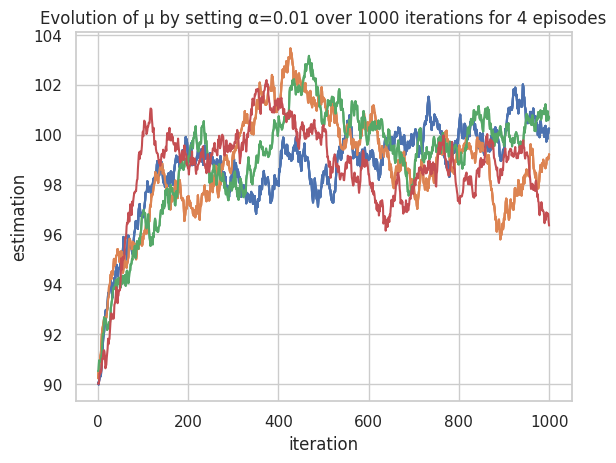

In [125]:
alpha_learning_rate(mu, sigma, 0.01, initial_mu=90)

### 2.3 - Analysis

We notice that, the lower alpha is, the more accurate the estimation will be in the long time. However, the lower alpha is, the more iteration will be needed to obtain equilibrium. We also notice that the closer µ0 is to µ, the less iteration will be needed to obtain a good result. 

## 3 - One over k power n learning rate

### 3.1 - Code

In [141]:
def one_over_k_power_n_learning_rate(mu, sigma, n, number_of_iteration: int = 1000, number_of_episodes: int = 4):

    df = pd.DataFrame(columns=['episode', 'iteration', 'estimation'])
    
    for i in range(1,number_of_episodes+1):
        estimated_mu = 0
        for k in range(1, number_of_iteration+1):
            alpha = 1/pow(k,n)
            estimated_mu = (1 - alpha) * estimated_mu +  alpha * np.random.normal(mu, sigma)
            df = pd.concat([df, pd.DataFrame.from_records([{'episode': f'{i}', 'iteration': k, 'estimation': estimated_mu}])])

    sns.lineplot(df, x='iteration', y='estimation', hue='episode', legend=False).set(title=f'Evolution of µ by setting α=1/k^{n} over {number_of_iteration} iterations for {number_of_episodes} episodes')
    plt.show()

### 3.2 - Plots

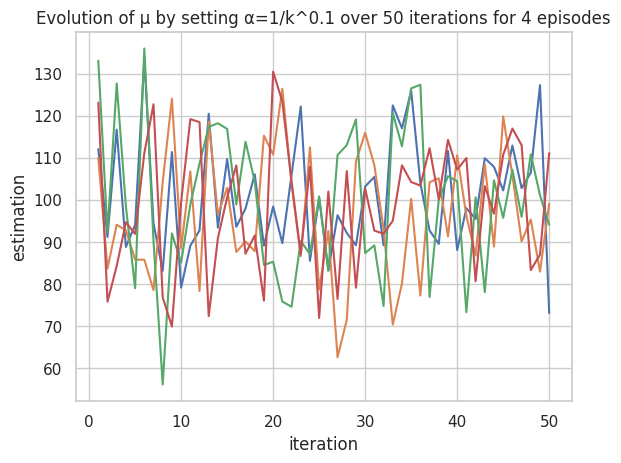

In [165]:
one_over_k_power_n_learning_rate(mu, sigma, n=0.1, number_of_iteration=50)

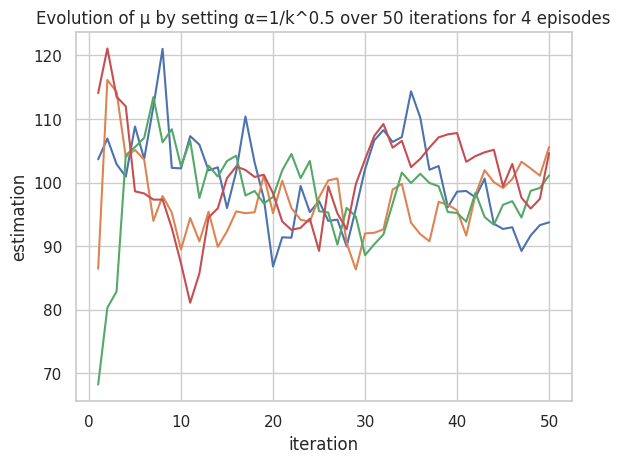

In [161]:
one_over_k_power_n_learning_rate(mu, sigma, n=0.5, number_of_iteration=50)

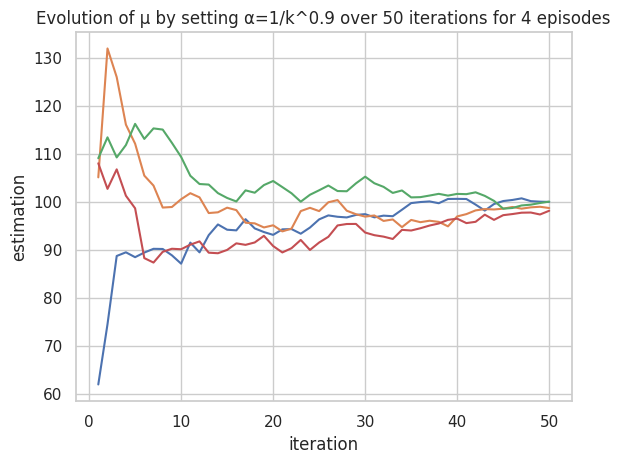

In [162]:
one_over_k_power_n_learning_rate(mu, sigma, n=0.9, number_of_iteration=50)

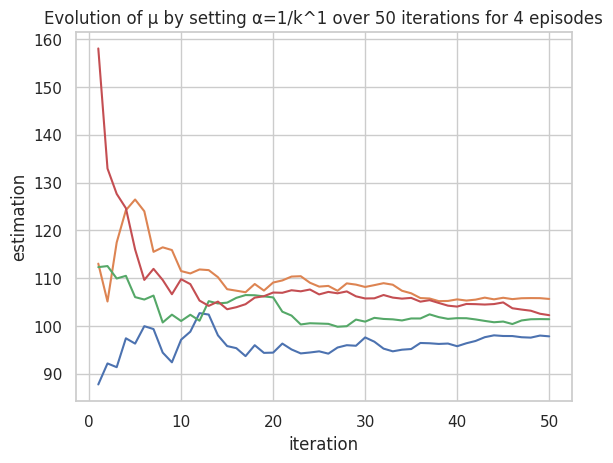

In [152]:
one_over_k_power_n_learning_rate(mu, sigma, n=1, number_of_iteration=50)

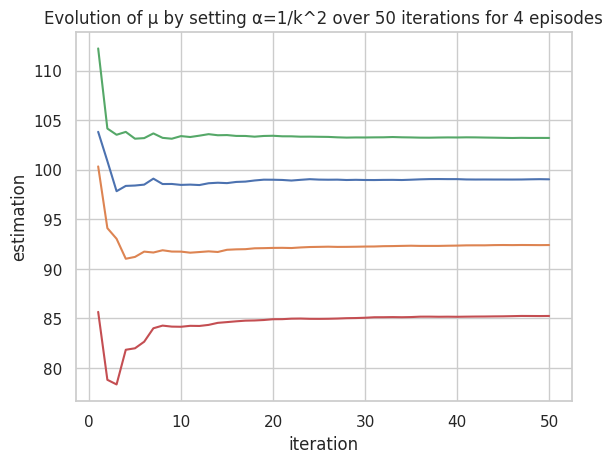

In [153]:
one_over_k_power_n_learning_rate(mu, sigma, n=2, number_of_iteration=50)

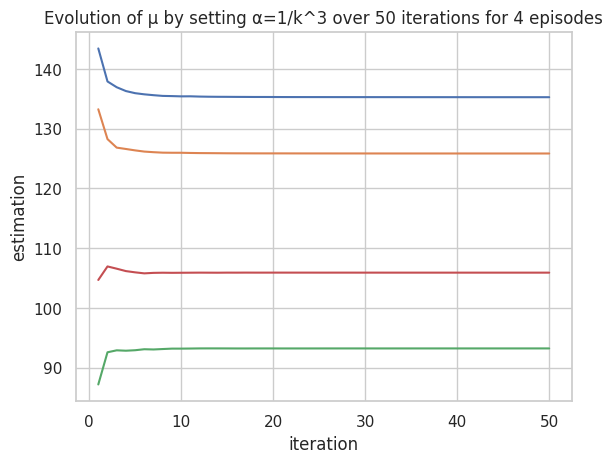

In [154]:
one_over_k_power_n_learning_rate(mu, sigma, n=3, number_of_iteration=50)

### 3.3 - Analysis

We notice that when n become low, the result stop to converge to a single value.

By contrast, we notice that, if n >= 2, then alpha become too little overtime and the result stop evolving. Moreover, the result is very much influanced by the first iterations of the algorithm